## Importing Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
data = pd.read_csv("Speed Dating Data.csv",encoding="ISO-8859-1")
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

## Data Exploration

In [6]:
data.groupby(['gender'])['iid'].count().reset_index()

,gender,iid
0,0,4184
1,1,4194


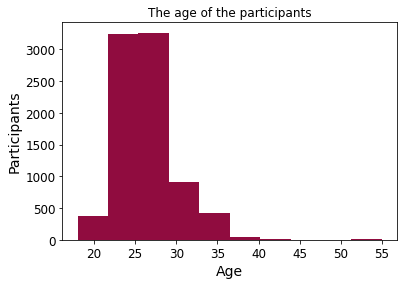

In [7]:
int_corr = data[np.isfinite(data['age'])]['age']
plt.hist(int_corr.values, color='#900C3F')
plt.xlabel('Age')
plt.ylabel('Participants')
plt.title('The age of the participants')
plt.show()

In [8]:
replace_map = {'goal': {1: "Seemed like a fun night out", 
                        2: "To meet new people", 
                        3: "To get a date" , 
                        4: "Looking for a serious relationship" ,
                        5: "To say I did it" ,
                        6: "Other" }}
Goal=data.replace(replace_map)
Goal['goal'].head()

0    To meet new people
1    To meet new people
2    To meet new people
3    To meet new people
4    To meet new people
Name: goal, dtype: object

In [9]:
intentions=Goal.groupby(['goal'])['iid'].count().reset_index()
intentions

,goal,iid
0,Looking for a serious relationship,301
1,Other,419
2,Seemed like a fun night out,3426
3,To get a date,631
4,To meet new people,3012
5,To say I did it,510


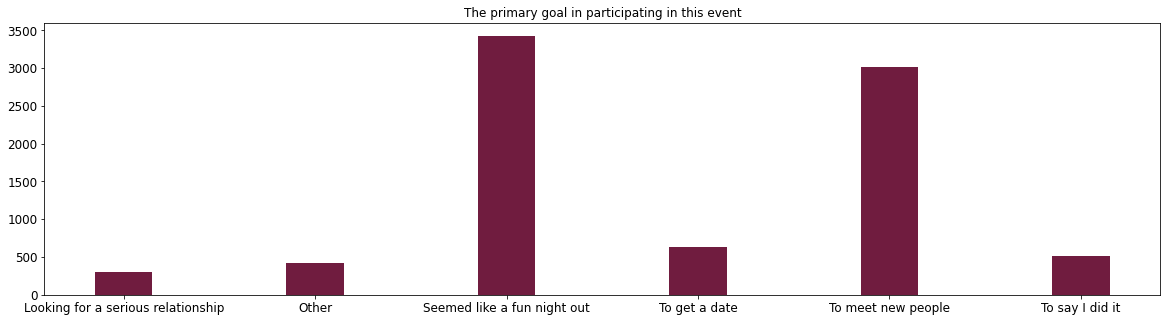

In [10]:
plt.figure(figsize = (20,5))

plt.bar(Goal.groupby(['goal'])['iid'].count().reset_index()['goal'], 
        Goal.groupby(['goal'])['iid'].count().reset_index()['iid'], color='#701C3F',
        width= 0.3, align='center')
plt.title("The primary goal in participating in this event")
plt.show()

In [11]:
replace_map2 = {'dec': {1: "Yes", 0: "No"}}
Decision=data.replace(replace_map2)

In [12]:
Decision.groupby(['gender','dec'])['iid'].count().reset_index()

,gender,dec,iid
0,0,No,2655
1,0,Yes,1529
2,1,No,2205
3,1,Yes,1989


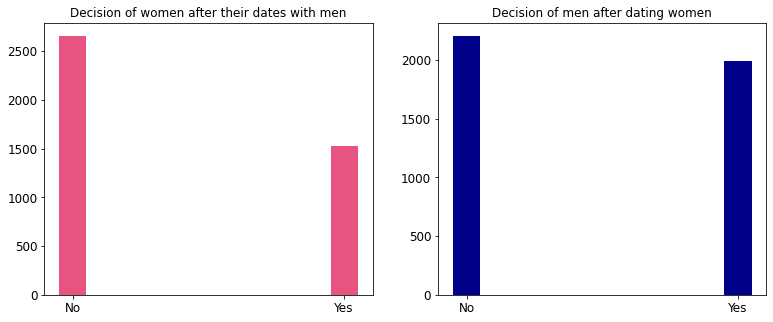

In [13]:
plt.figure(figsize = (20,5))

plt.subplot(131)


plt.bar(Decision[Decision['gender']==0].groupby(['dec'])['iid'].count().reset_index()['dec'], 
        Decision[Decision['gender']==0].groupby(['dec'])['iid'].count().reset_index()['iid'], color="#E75480",
        width= 0.1, align='center')
plt.title("Decision of women after their dates with men")
plt.subplot(132)

plt.bar(Decision[Decision['gender']==1].groupby(['dec'])['iid'].count().reset_index()['dec'],
        Decision[Decision['gender']==1].groupby(['dec'])['iid'].count().reset_index()['iid'], color="darkblue",
                width= 0.1, align='center')
plt.title("Decision of men after dating women")
plt.show()


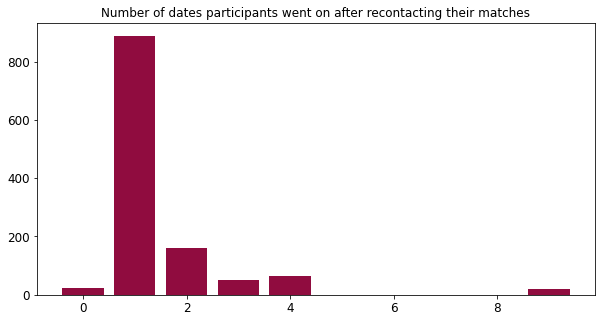

In [14]:
plt.figure(figsize = (10,5))

plt.bar(data[data['date_3']==1].groupby(['numdat_3'])['iid'].count().reset_index()['numdat_3'],
        data[data['date_3']==1].groupby(['numdat_3'])['iid'].count().reset_index()['iid'], color='#900C3F',
            width= 0.8, align='center')
plt.title('Number of dates participants went on after recontacting their matches')

plt.show()

In [15]:
replace_map3 = {'match': {0: "No Match", 1: "Match"}}

In [16]:
replace_map3 = {'match': {0: "No Match", 1: "Match"}}
matches=data.replace(replace_map3)

In [17]:
matches.groupby(['match'])['iid'].count().reset_index()

,match,iid
0,Match,1380
1,No Match,6998


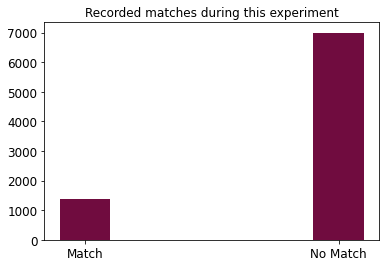

In [18]:
plt.bar(matches.groupby(['match'])['iid'].count().reset_index()['match'], 
        matches.groupby(['match'])['iid'].count().reset_index()['iid'], color='#700C3F', width=0.2 )
plt.title("Recorded matches during this experiment")
plt.show()

In [19]:
data['all']  = 0
Reality2=data.groupby(['all'])['attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s',
                                            'attr_o','sinc_o','intel_o','fun_o','amb_o'].mean()
Reality2

C:\Users\mayes\AppData\Local\Temp/ipykernel_3236/3782360114.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Reality2=data.groupby(['all'])['attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s',


,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,attr_o,sinc_o,intel_o,fun_o,amb_o
all,,,,,,,,,,
0,7.21125,8.082,8.25775,7.6925,7.58925,6.190411,7.175256,7.369301,6.400599,6.778409


In [20]:
df_diff = pd.DataFrame()

list_cols = Reality2.columns
new_col_names = ['Attractive','Sincere','Intelligent','Fun','Ambitious']
list_values = []
for i in range(5):
    calc = float(Reality2[list_cols[i]]-Reality2[list_cols[i+5]])
    list_values.append(calc)
    df_diff[new_col_names[i]] = [float(Reality2[list_cols[i]]),
                                float(Reality2[list_cols[i+5]]),
                                calc]
    
df_diff['Different perceptions'] = ['Personal rating','Others rating','Difference']
df_diff.set_index('Different perceptions',inplace=True)

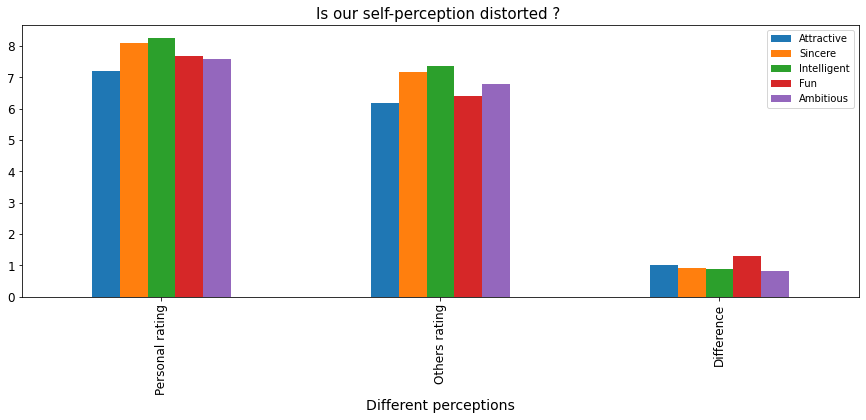

In [21]:
df_diff.plot(kind='bar', figsize=(15,5))
plt.title('Is our self-perception distorted ? ', fontsize=15)
plt.show()

## Feature Engineering

In [22]:
DATA3=data[['iid','gender','match','dec','attr','sinc','intel','fun','amb','shar','like']].drop_duplicates().reset_index()
replace_map5 = {'match': { 1: "Match", 0:"No match" }}
DATA3.replace(replace_map5, inplace=True)
Features=DATA3.groupby(['match'])['attr','sinc','intel','fun','amb','shar'].mean()
Features.rename(columns={'attr': 'Attractive', 'sinc': 'Sincere','intel': 'Intelligent','fun': 'Fun','amb': 'Ambitious','shar': 'Shared interests'}, inplace=True)
Features

C:\Users\mayes\AppData\Local\Temp/ipykernel_3236/3834265251.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Features=DATA3.groupby(['match'])['attr','sinc','intel','fun','amb','shar'].mean()


,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared interests
match,,,,,,
Match,7.301915,7.794226,7.937084,7.585746,7.314786,6.729502
No match,5.942530,7.041229,7.249657,6.144612,6.659328,5.184059


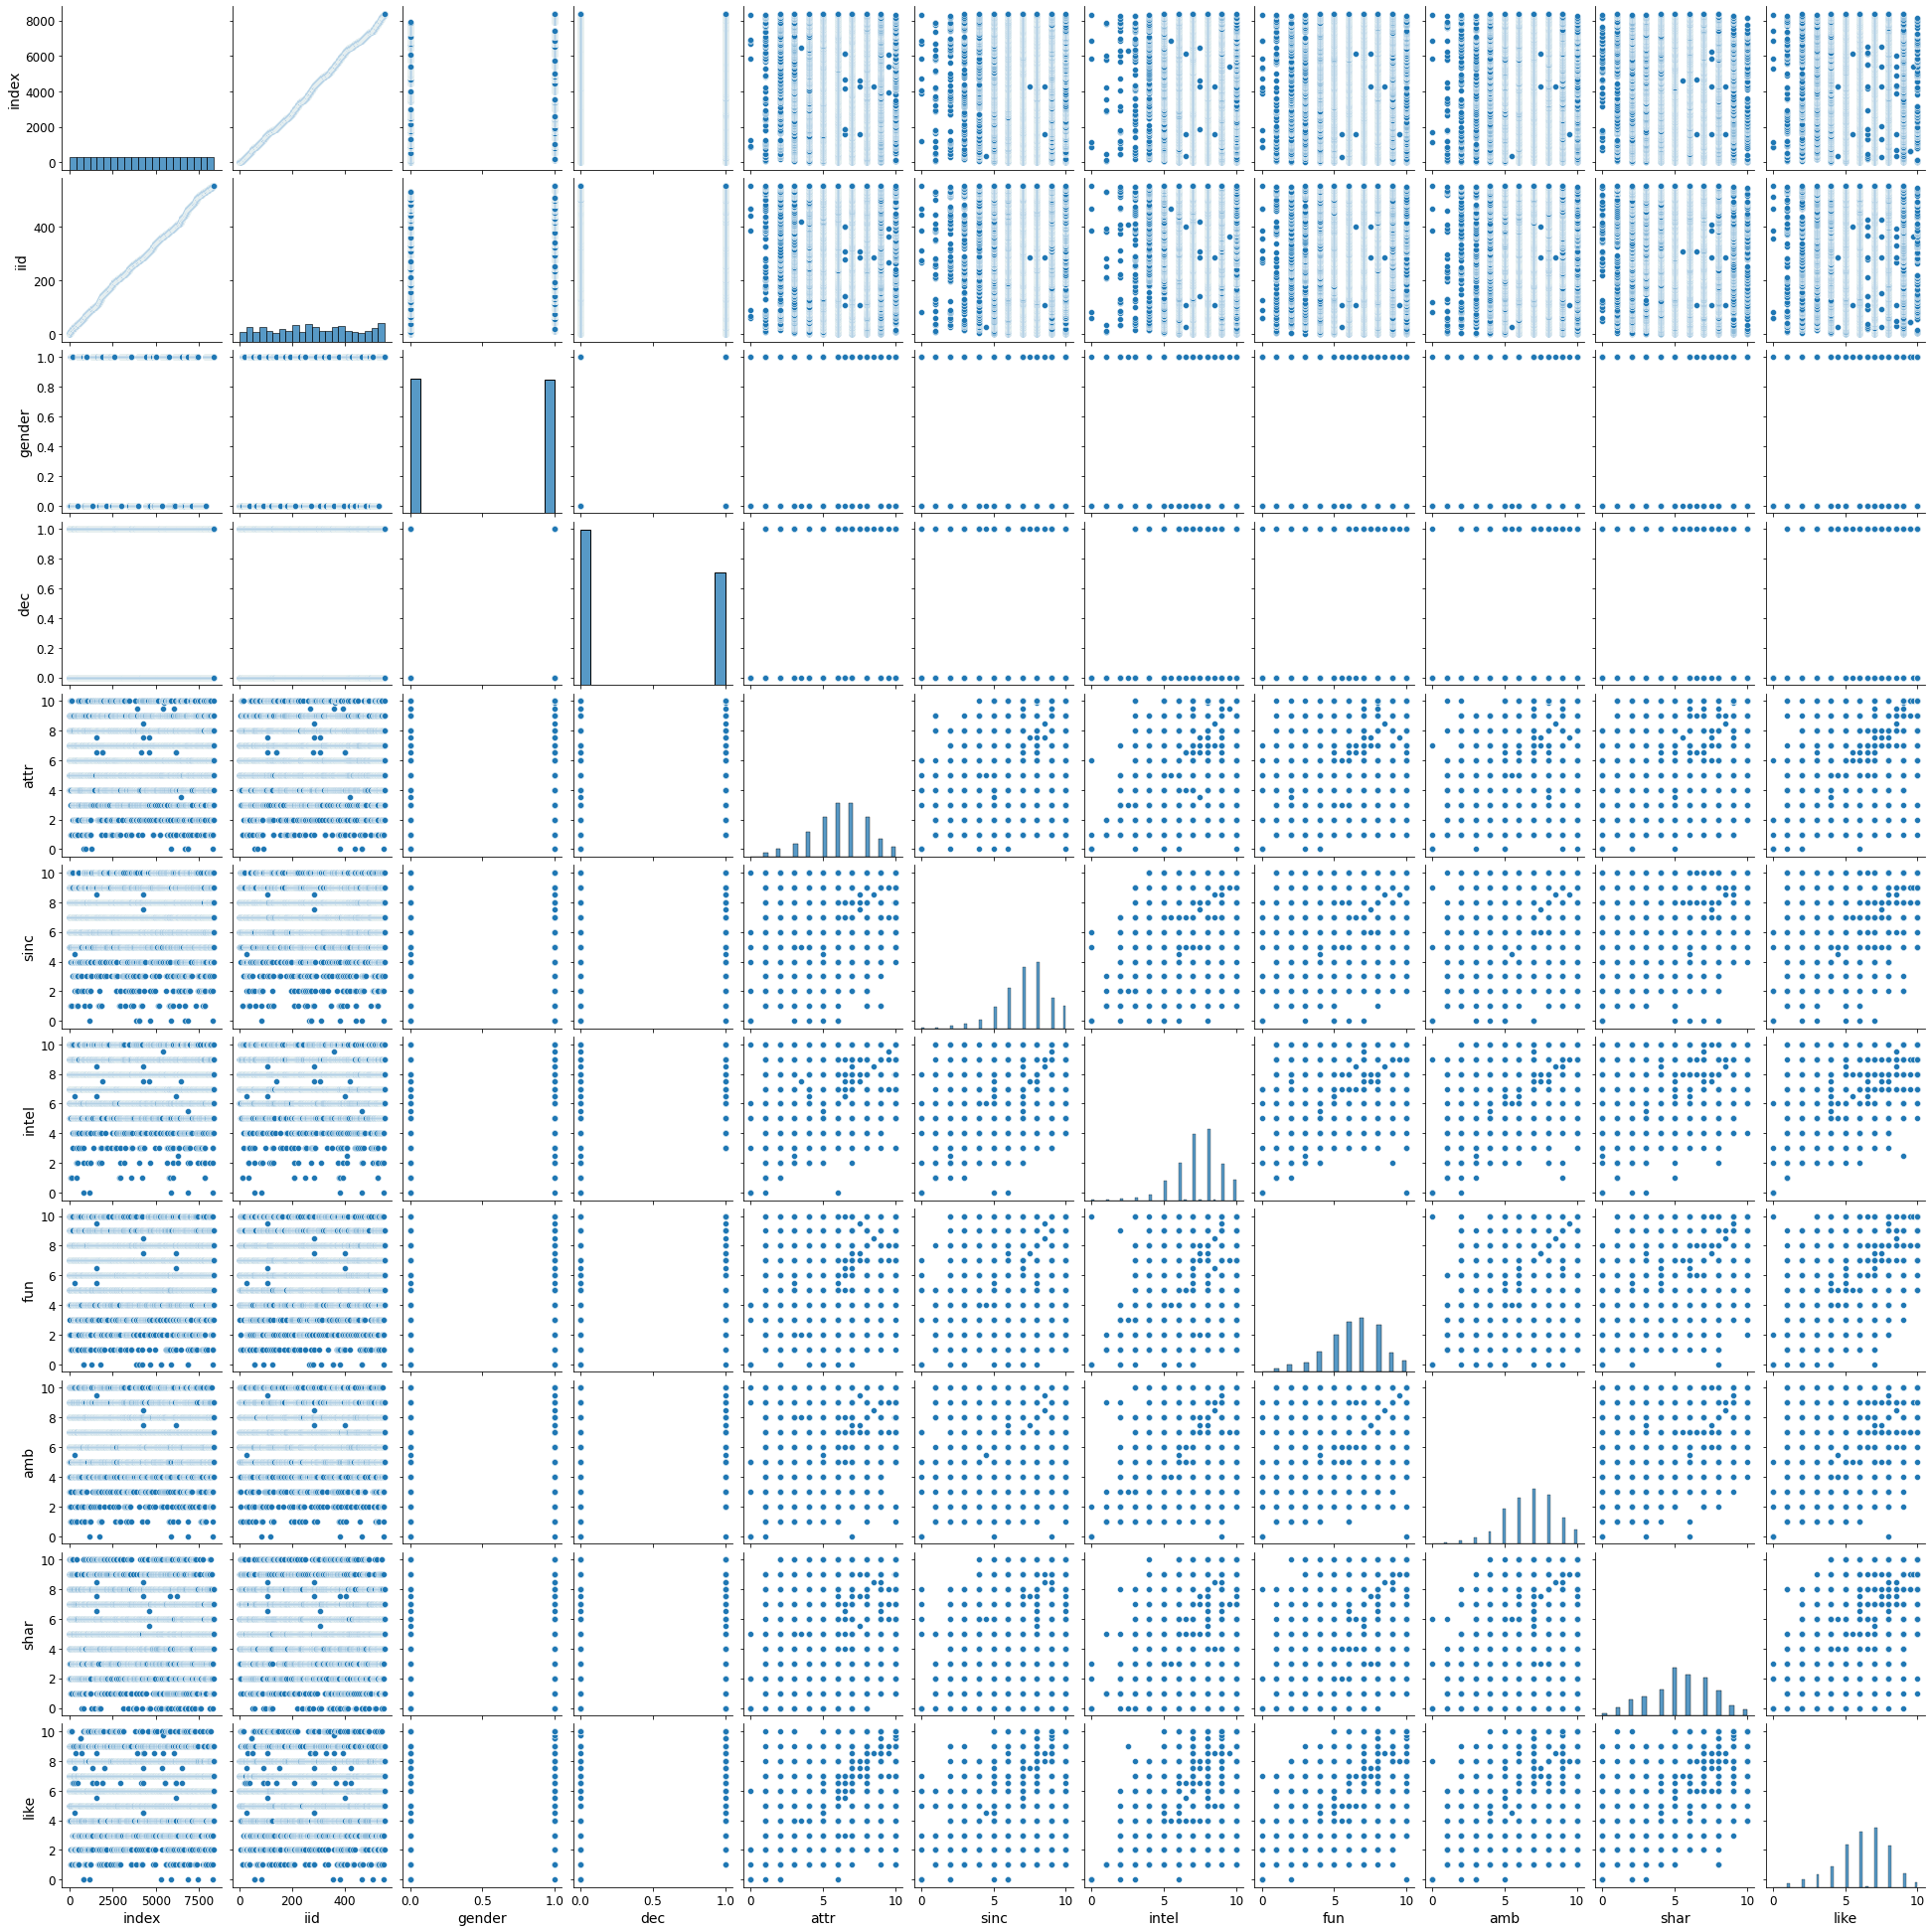

In [23]:
import seaborn as sns
sns.pairplot(DATA3)
plt.show()

In [24]:
dating_data=data[['gender','iid',
                    'attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s',
                    'attr','sinc','intel','fun','amb','shar','match']]

In [25]:
dating_data.isnull().sum()

gender         0
iid            0
attr3_s     4378
sinc3_s     4378
intel3_s    4378
fun3_s      4378
amb3_s      4378
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
match          0
dtype: int64

In [26]:
dating_data_clean=dating_data.dropna().reset_index()

In [27]:
dating_data_clean.shape

(3373, 15)

In [28]:
dating_data_clean.info()
dating_data_clean_without_duplicates = dating_data_clean.drop_duplicates()
print(dating_data_clean.shape)
print(dating_data_clean_without_duplicates.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     3373 non-null   int64  
 1   gender    3373 non-null   int64  
 2   iid       3373 non-null   int64  
 3   attr3_s   3373 non-null   float64
 4   sinc3_s   3373 non-null   float64
 5   intel3_s  3373 non-null   float64
 6   fun3_s    3373 non-null   float64
 7   amb3_s    3373 non-null   float64
 8   attr      3373 non-null   float64
 9   sinc      3373 non-null   float64
 10  intel     3373 non-null   float64
 11  fun       3373 non-null   float64
 12  amb       3373 non-null   float64
 13  shar      3373 non-null   float64
 14  match     3373 non-null   int64  
dtypes: float64(11), int64(4)
memory usage: 395.4 KB
(3373, 15)
(3373, 15)


In [29]:
feature_variances = dating_data_clean.std().sort_values(ascending=True)
features_low_variance = feature_variances[feature_variances < 0.1].index.values.tolist()
features_low_variance

[]

In [30]:
correlations = dating_data_clean.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
correlations = correlations[correlations != 1]

In [31]:
match_correlations = correlations.loc['match']
match_correlations[match_correlations > 0.1]

attr     0.257507
sinc     0.175609
intel    0.169164
amb      0.138288
dtype: float64

In [32]:
lowest_correlation = match_correlations[match_correlations < 0.1].axes[0].to_list()
lowest_correlation

['attr3_s', 'amb3_s', 'sinc3_s', 'gender', 'iid']

## Splitting

In [33]:
from sklearn.model_selection import train_test_split
X=dating_data_clean[['gender',
                     'attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s',
                     'attr','sinc','intel','fun','amb','shar']]
y=dating_data_clean['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3, stratify=y)

## Evaluation Metric Functions

In [34]:
from sklearn.metrics import confusion_matrix
def get_cf_matrix(y_test,x_test,model):
    return confusion_matrix(y_test,model.predict(x_test))

In [38]:
from sklearn.metrics import classification_report,accuracy_score
def get_CReport(y_test,x_test,model):
    return classification_report(y_test, model.predict(X_test))

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_ROC(y_test,X_test,model,model_name):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC CURVE: {model_name}')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

## Perceptron Classification

In [39]:
from sklearn.linear_model import Perceptron

model_pptron = Perceptron(tol=1e-3,random_state=0)
model_pptron.fit(X_train,y_train)

predict_train_pptron = model_pptron.predict(X_train)
predict_test_pptron = model_pptron.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_pptron))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_pptron))



Training Accuracy: 0.4925008719916289
Validation Accuracy: 0.5079051383399209


In [40]:
pptron_cm = get_cf_matrix(y_test,X_test,model_pptron)
pptron_cr = get_CReport(y_test,X_test,model_pptron)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc.fit(X_train,y_train)
predict_train_dtc = model_dtc.predict(X_train)
predict_test_dtc = model_dtc.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_dtc))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_dtc))



In [ ]:
dtc_cm = get_cf_matrix(y_test,X_test,model_dtc)
dtc_cm = get_CReport(y_test,X_test,model_dtc)

In [ ]:
plot_ROC(y_test,X_test,model_dtc,"DecisionTree Classifier")

## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

model_log_reg = LogisticRegression(C=3, random_state=43)
model_log_reg.fit(X_train, y_train)
predict_train_log_reg = model_log_reg.predict(X_train)
predict_test_log_reg = model_log_reg.predict(X_test)
print('Training Accuracy Score:', accuracy_score(y_train, predict_train_log_reg))
print('Validation Accuracy Score :', accuracy_score(y_test, predict_test_log_reg))

Log_reg_score_before=accuracy_score(y_test, predict_test_log_reg)

In [ ]:
log_reg_cr = get_CReport(y_test,X_test,model_log_reg)
log_reg_CM = get_cf_matrix(y_test,X_test,model_log_reg)

In [ ]:
plot_ROC(y_test,X_test,model_log_reg,"Logistic Regression")

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_rf = model.fit(X_train, y_train)
predict_train_rf = model_rf.predict(X_train)
predict_test_rf = model_rf.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_rf))

Rf_score_before=accuracy_score(y_test, predict_test_rf)

In [ ]:
rf_CM = get_cf_matrix(y_test,X_test,model_rf)
rf_cr = get_CReport(y_test,X_test,model_rf)
print(rf_CM)

In [ ]:
plot_ROC(y_test,X_test,model_rf,"Random Forest")

## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaB = AdaBoostClassifier(n_estimators=100,random_state=0)
model_adaB.fit(X_train,y_train)
predict_train_adaB = model_adaB.predict(X_train)
predict_test_adaB = model_adaB.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_adaB))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_adaB))

In [ ]:
adaB_cm = get_cf_matrix(y_test,X_test,model_adaB)
adaB_cr = get_CReport(y_test,X_test,model_adaB)

In [ ]:
plot_ROC(y_test,X_test,model_adaB,"AdaBoost")

## Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gB = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)
model_gB.fit(X_train,y_train)
predict_train_gB = model_adaB.predict(X_train)
predict_test_gB = model_adaB.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_gB))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_gB))


In [ ]:
gB_cm = get_cf_matrix(y_test,X_test,model_gB)
gB_cr = get_CReport(y_test,X_test,model_gB)

In [ ]:
plot_ROC(y_test,X_test,model_gB,"GradientBoost")

# Neural Network

In [53]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
dataset = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
iid_group = dataset.groupby(by=["iid"])

# The question 'How do you think others perceive you?' is not answered for all the dataset
data_wth_perception = []
data_wthout_perception = []

ftr_list_1 = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
ftr_list_2 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
percep_ftr_list = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']
result_ftr_list = ['you_call', 'them_cal']

In [55]:

attribute_list_1 = ['attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']
attribute_list_2 = ['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']
X = []
Y = []

for subject in iid_group:
    if np.isnan(subject[1]['attr5_2'].iat[0]) or\
        np.isnan(subject[1]['attr3_2'].iat[0]) or\
        np.isnan(subject[1]['them_cal'].iat[0]):
        continue
    
    x_to_insert = []
    
    for i in range(len(attribute_list_1)):
        x_to_insert.append(subject[1][attribute_list_1[i]].iat[0])
        x_to_insert.append(subject[1][attribute_list_2[i]].iat[0])
    
    X.append(x_to_insert)
    
    if subject[1]['them_cal'].iat[0] == 0:
        Y.append(0)
    else:
        Y.append(1)

X = np.array(X)
Y = np.transpose(np.array([Y]))

In [56]:

div_bound = int(X.shape[0] * 0.7)
X_tr = X[:div_bound, :]
Y_tr = Y[:div_bound, :]
X_te = X[div_bound:, :]
Y_te = Y[div_bound:, :]
X_to_use = X
Y_to_use = Y


print("\n X shape: ", X.shape,\
    "\n Y shape: ", Y.shape,\
    "\n X tr shape: ", X_tr.shape,\
    "\n X te shape: ", X_te.shape,\
    "\n Y tr shape: ", Y_tr.shape,\
    "\n Y te shape: ", Y_te.shape)


 X shape:  (121, 10) 
 Y shape:  (121, 1) 
 X tr shape:  (84, 10) 
 X te shape:  (37, 10) 
 Y tr shape:  (84, 1) 
 Y te shape:  (37, 1)


In [57]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
from keras.regularizers import L1L2

In [58]:

import keras.backend as K
K.clear_session()

seed = 9
np.random.seed(seed)

In [59]:
from keras import optimizers
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.lost = np.array([])
        self.val_acc = np.array([])
    def on_batch_end(self, batch, logs={}):
        self.lost = np.append(self.lost, logs.get('loss'))
        
        
    def on_epoch_end(self, epoch, logs):
        self.val_acc = np.append(self.val_acc, logs.get('val_acc'))

In [60]:
def Speeddate_Train(X_tr, Y_tr, X_te, Y_te, act='sigmoid', hidden_n = 0, opt='Adam',\
                    dropout_r=0, lam_l1=0, lam_l2=0, epo=20, bat=1):
    history_cb = LossHistory()
    K.clear_session()
    
    model = Sequential()
    model.add(Dense(X_tr.shape[1], input_shape=(X_tr.shape[1],), activation=act,\
                    kernel_regularizer = L1L2(lam_l1, lam_l2), name='hidden'))
    model.add(Dropout(dropout_r))
    
    # Insert hidden layers
    for i in range(hidden_n):
        model.add(Dense(X_tr.shape[1], input_shape=(X_tr.shape[1],), activation=act,\
                        kernel_regularizer = L1L2(lam_l1, lam_l2), name='hidden' + str(i)))
        model.add(Dropout(dropout_r))
    
    model.add(Dense(Y_tr.shape[1], activation='softmax', kernel_regularizer = L1L2(lam_l1, lam_l2), name='output'))
    
    model.compile(optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    model.fit(X_tr, Y_tr, epochs=epo, batch_size=bat, validation_data=(X_te, Y_te),
        callbacks=[history_cb], verbose=0)
    
    return [model, history_cb]

def plot_loss_acc(history_cb, X_tr, bat=1):
    plt.plot(range(len(history_cb.val_acc)), history_cb.val_acc, 'c-')#np.log(alphas), ridge_errors, 'co')
    plt.xlabel('Epoch')
    plt.ylabel('val_acc')
    plt.show()

    plt.semilogy(np.array(range(len(history_cb.lost)))* bat / X_tr.shape[0],
                history_cb.lost, 'c-')
    plt.xlabel('batch')
    plt.ylabel('Loss values')
    plt.show()

In [61]:
from sklearn.model_selection import KFold

def Speeddate_Train_K(X, Y, act='sigmoid', hidden_n = 0, opt='Adam',\
                    dropout_r=0, lam_l1=0, lam_l2=0, epo=20, bat=1, k=7, seed=9):

    kfold = KFold(n_splits = k, shuffle=True, random_state = seed)
    cvscores = []
    for train,test in kfold.split(X, Y):
        [model ,history_cb] = Speeddate_Train(X[train], Y[train], X[train], Y[train],\
                                            hidden_n = hidden_n, opt=opt,\
                                            lam_l1=lam_l1, lam_l2=lam_l2, dropout_r = dropout_r,\
                                            epo=epo, bat=bat)

        scores = model.evaluate(X[test], Y[test], verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1]*100)

    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    return [np.mean(cvscores), np.std(cvscores)]

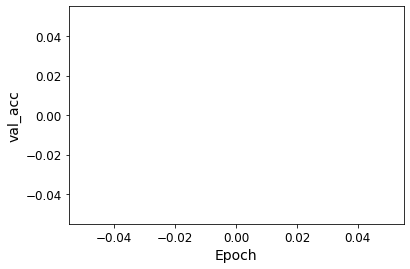

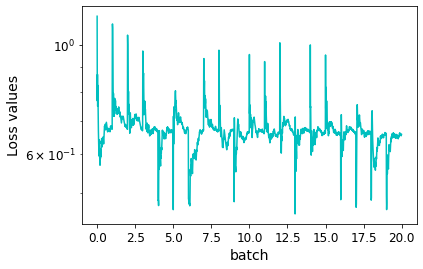

accuracy: 55.56%
accuracy: 38.89%
accuracy: 70.59%
accuracy: 58.82%
accuracy: 64.71%
accuracy: 41.18%
accuracy: 47.06%
53.83% (+/- 11.06%)


In [62]:
activation_set = ['sigmoid', 'tanh', 'relu']
hidden_n_set = [0, 5, 10]
opt_set = ['SGD', 'Adam', 'Nadam']
dropout_set = [0, 0.2, 0.5]
lam_l1_set = [0, 0.001, 0.1]
lam_l2_set = [0, 0.001, 0.1]

l1 = 0
l2 = 0
d_r = 0
o = 'Adam'
a = 'sigmoid'
n = 0

seed = 999
np.random.seed(seed)

[model ,history_cb] = Speeddate_Train(X_tr, Y_tr, X_te, Y_te, hidden_n = n, opt=o,\
                                    act = a, lam_l1=l1, lam_l2=l2, dropout_r = d_r, epo=20, bat=1)

plot_loss_acc(history_cb, X_tr)

[score, std] = Speeddate_Train_K(X_to_use, Y_to_use, \
                            act=a, hidden_n=n, opt=o,\
                            dropout_r=d_r, lam_l1=l1, lam_l2=l1, epo=20, bat=5, k=7, seed=seed)